# Exercício 01 - Aula: 04/09/2023

A probablistic Classification System for Predicting the Cellular Localization Sites of Proteins.

1. Análise dos dados
2. Desenvolver modelo
3. Report de métricas

Dataset: Yeast Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

## Carregando o dataset

In [2]:
yeast = pd.read_csv("Datasets/yeast.csv")
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Análises do dataset

In [3]:
yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [4]:
# Informações de Tamanho (Linha, Coluna)
yeast.shape

(1484, 9)

In [5]:
# Verificando os tipos das variáveis
yeast.dtypes

mcg     float64
gvh     float64
alm     float64
mit     float64
erl     float64
pox     float64
vac     float64
nuc     float64
name     object
dtype: object

In [6]:
# Verificando se existem dados vazios
yeast.isna().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [7]:
yeast.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [8]:
# Verificando algumas métricas estatísticas do dataset
yeast.describe().T

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,0.500121,0.137299,0.11,0.41,0.49,0.58,1.00
gvh,1484.0,0.499933,0.123924,0.13,0.42,0.49,0.57,1.00
alm,1484.0,0.500034,0.086670,0.21,0.46,0.51,0.55,1.00
mit,1484.0,0.261186,0.137098,0.00,0.17,0.22,0.32,1.00
erl,1484.0,0.504717,0.048351,0.50,0.50,0.50,0.50,1.00
pox,1484.0,0.007500,0.075683,0.00,0.00,0.00,0.00,0.83
vac,1484.0,0.499885,0.057797,0.00,0.48,0.51,0.53,0.73
nuc,1484.0,0.276199,0.106491,0.00,0.22,0.22,0.30,1.00


/home/pedropadilha/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


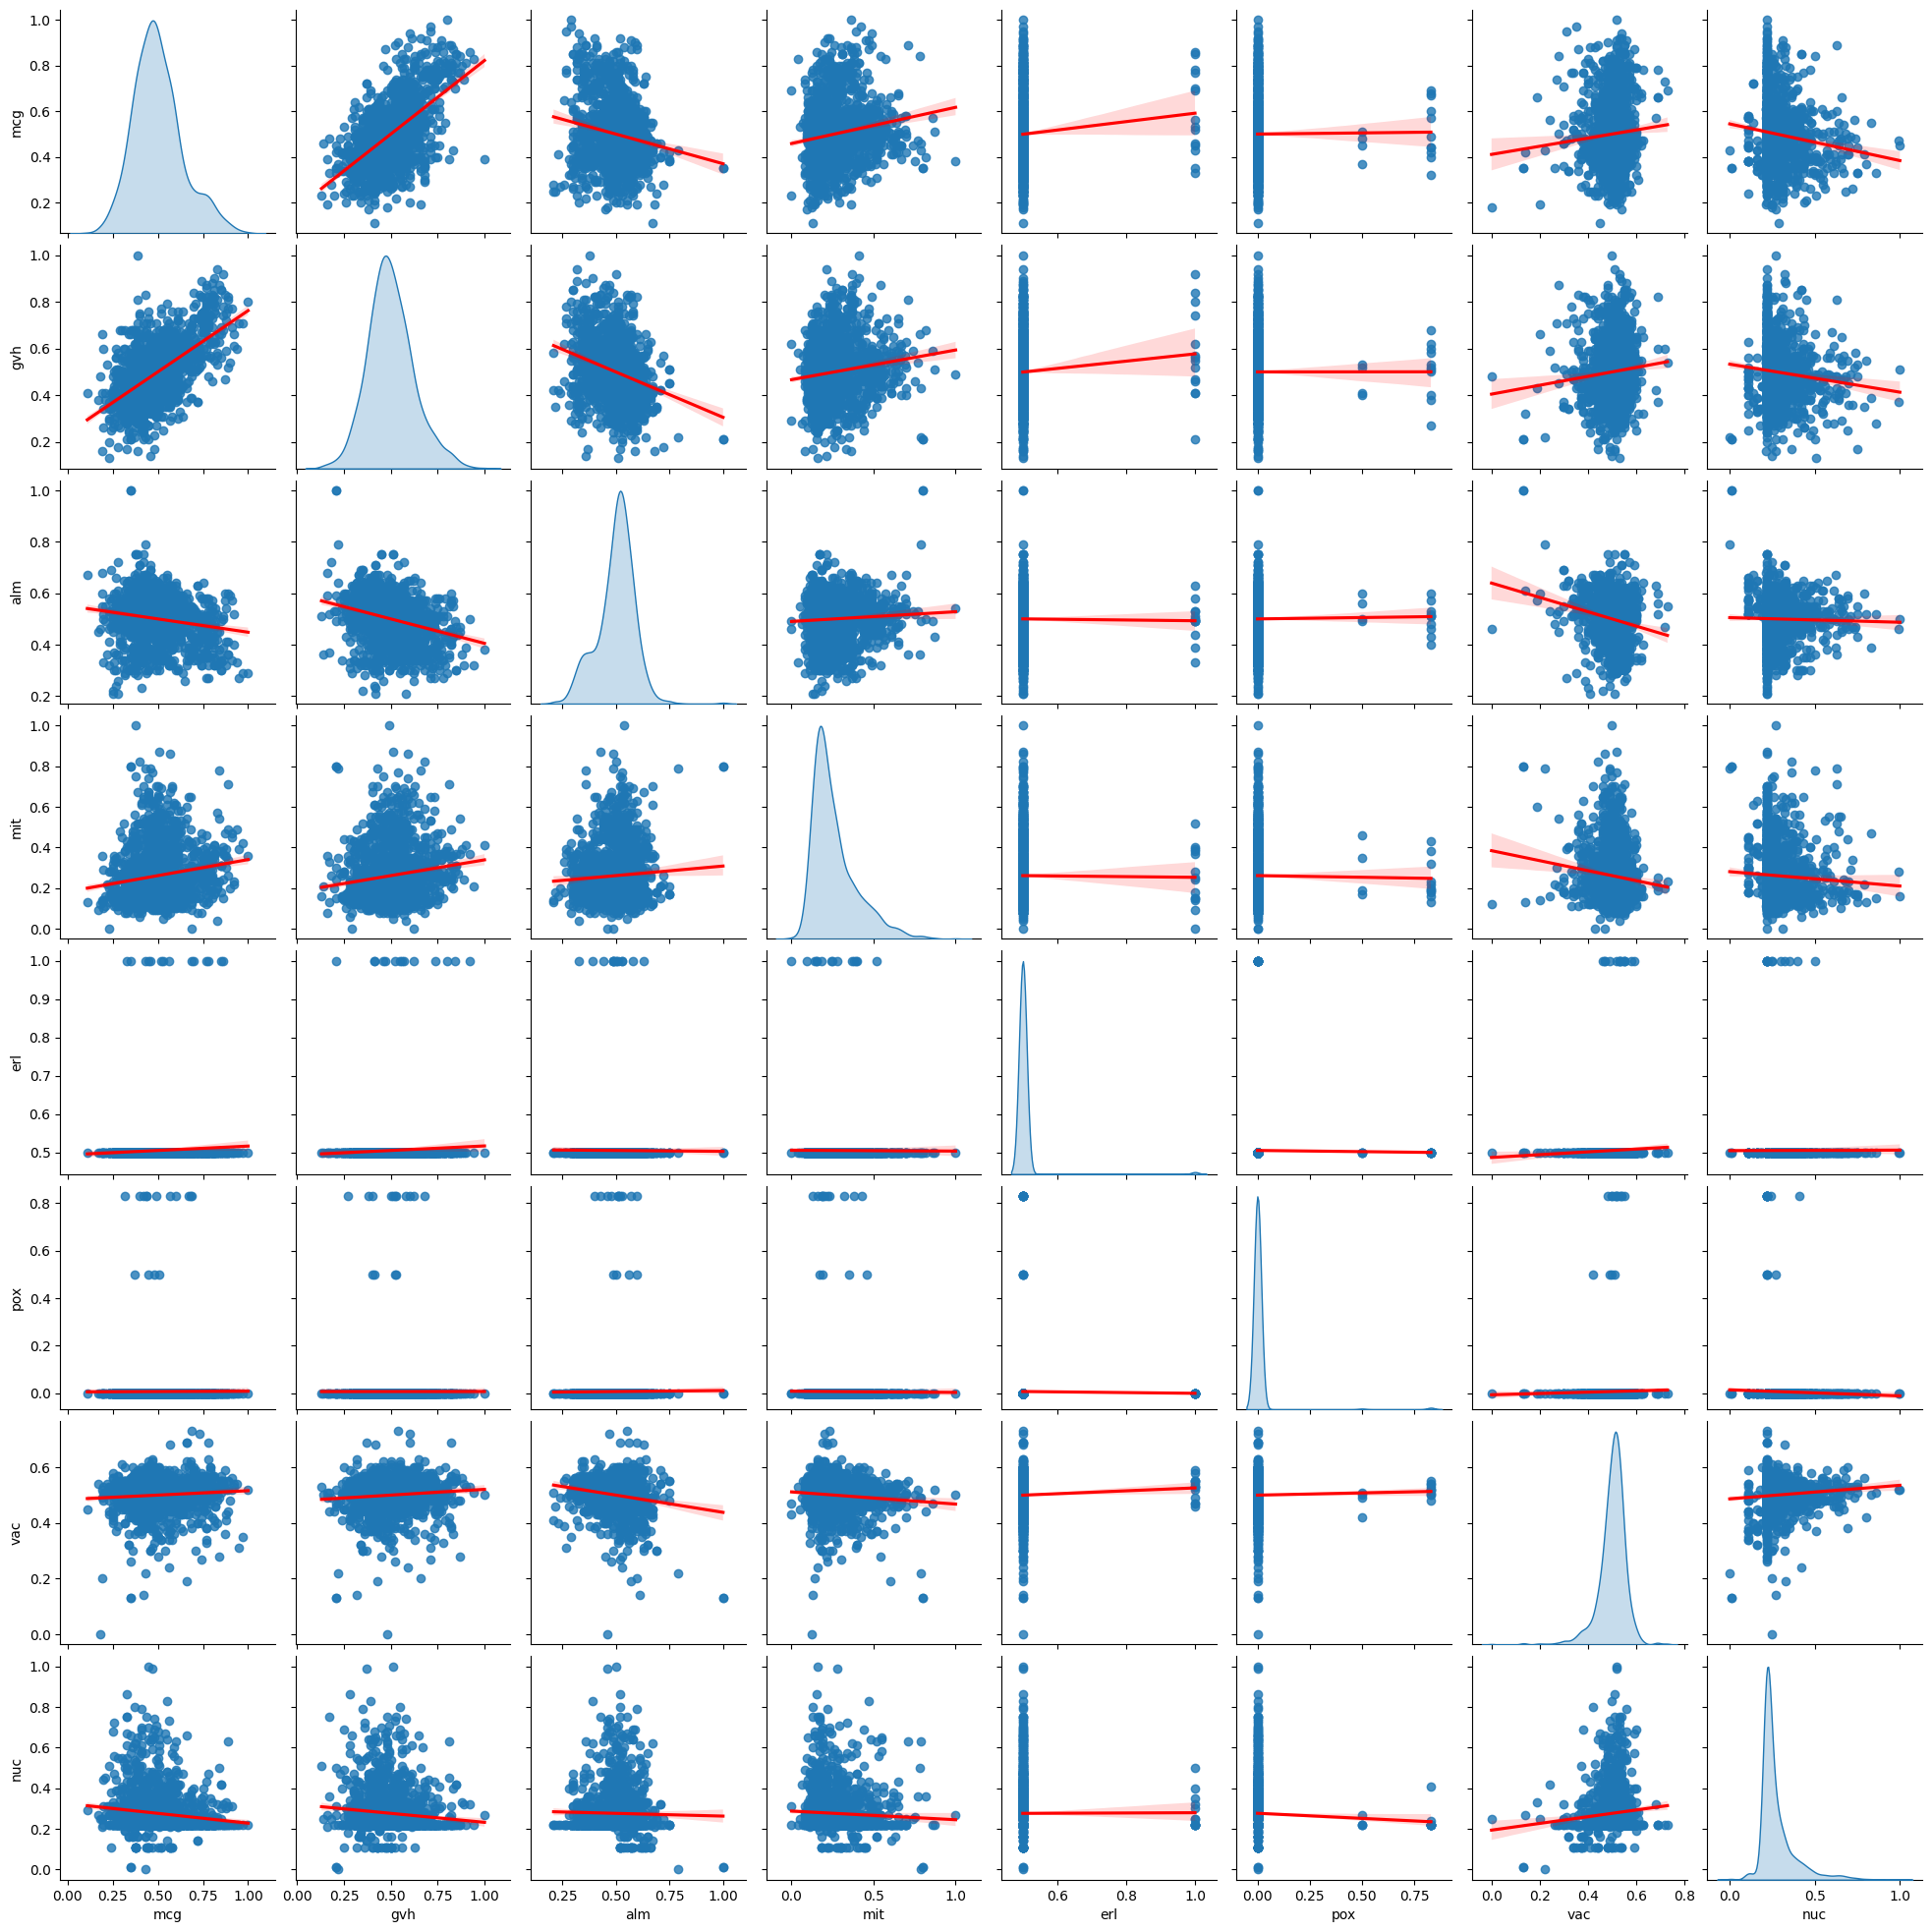

In [9]:
# Verificando as relações e tendências dos dados
# sns.pairplot(yeast)
sns.pairplot(yeast, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

<Axes: >

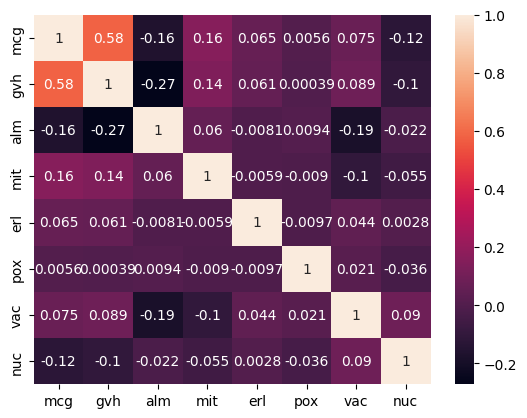

In [10]:
# Verificando a correlação entre os dados
corr = yeast.drop("name", axis=1).corr()
sns.heatmap(corr, annot=True)

## Modelo - Regressão Logística

Target: name (Yeast Classification)

In [11]:
# Verificando a Target
yeast.name.value_counts()

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

In [12]:
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [13]:
# Definindo o modelo (entrada)
X = yeast.drop('name', axis=1)
# print(X)

In [14]:
# Definindo a saída (Target)
y = yeast.name
# print(y)

# Encodando o Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [15]:
xtr, xts, ytr, yts = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [16]:
reg_log = LogisticRegression()
reg_log.fit(xtr, ytr)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = reg_log.predict(xts)

In [18]:
accuracy_score(yts, y_pred)

0.5757575757575758

## Report

In [19]:
print(classification_report(y_pred, yts))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       134
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.67      0.75      0.71         8
           4       0.00      0.00      0.00         0
           5       0.75      0.77      0.76        31
           6       0.57      0.52      0.54        54
           7       0.52      0.65      0.58        69
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         0

    accuracy                           0.58       297
   macro avg       0.35      0.42      0.36       297
weighted avg       0.65      0.58      0.60       297



/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
